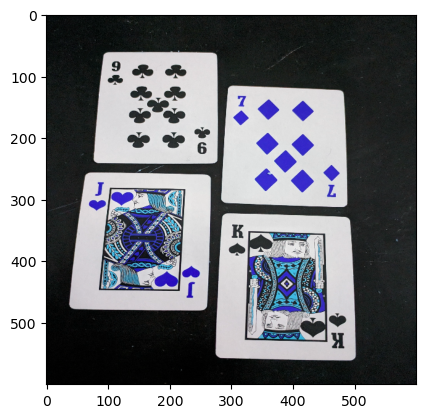

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread("goal/suits.jpg")
image = cv2.resize(image, (600, 600))
plt.imshow(image)



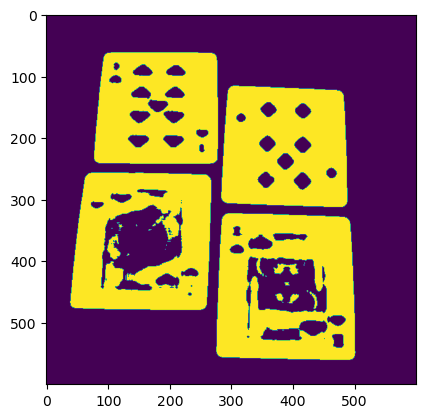

In [2]:
#find the shape outlines
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(11,11),100)
ret,thresh = cv2.threshold(blur,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

Number of Contours found = 4


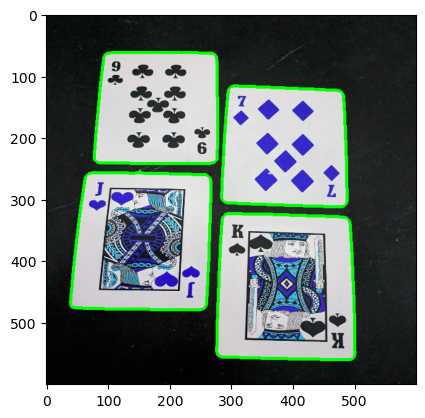

In [3]:

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
print("Number of Contours found = " + str(len(contours)))  
img_with_outlines= image.copy()
img_with_outlines = cv2.drawContours(img_with_outlines, contours, -1, (0, 255, 0), 3) 
plt.imshow(img_with_outlines) 



[[291 324]]
[[278 552]]
[[496 559]]
[[491 334]]
[[ 69 258]]
[[ 40 472]]
[[256 477]]
[[266 266]]
[[300 117]]
[[286 302]]
[[483 311]]
[[479 126]]
[[95 66]]
[[ 81 239]]
[[277 236]]
[[272  64]]


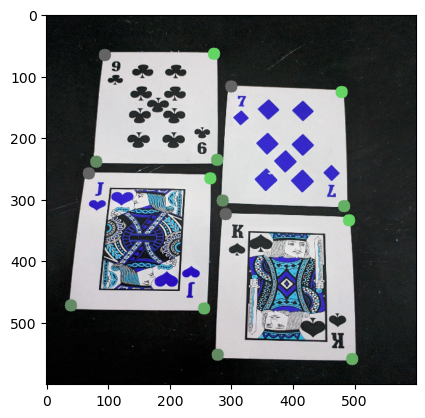

In [4]:

#filter the noise out
image_area= image.shape[0] * image.shape[1]
card_contours=[]
for contour in contours:
    if cv2.contourArea(contour) > image_area/20:
        card_contours.append(contour)


#plot corners
image_with_corners = image.copy()
for contour in card_contours:
    perimeter = cv2.arcLength(contour,True)
    approximated_perimeter = cv2.approxPolyDP(contour,perimeter/20,True)
    pts = np.int32(approximated_perimeter)
    for i, point in enumerate(pts):
        print(point)
        x= i if i < 4 else 4
        image_with_corners = cv2.circle(image_with_corners, point[0], radius=10, color=(100,100+x*150/4 , 100), thickness=-1)

plt.imshow(image_with_corners)


(276, 323, 226, 238)


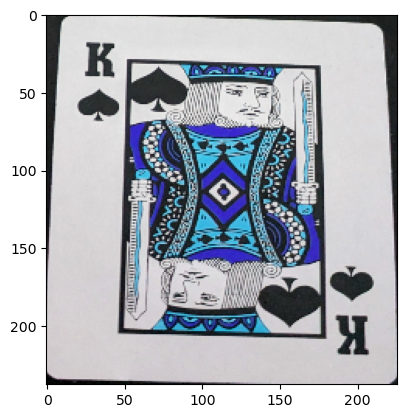

In [5]:

contour = card_contours[0]
x,y,w,h = cv2.boundingRect(contour)
print(cv2.boundingRect(contour))
cropped = image[y:y+h, x:x+w,:].copy()
plt.imshow(cropped)


Number of Contours found = 1


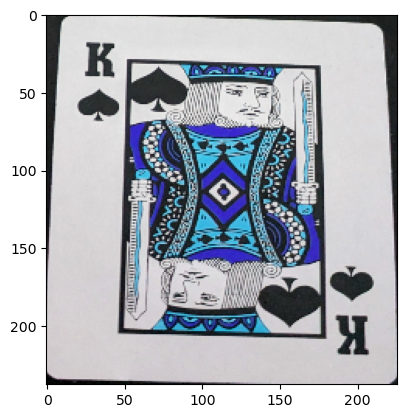

In [14]:
#find the shape outlines
gray = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(11,11),100)
ret,thresh = cv2.threshold(blur,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
print("Number of Contours found = " + str(len(contours)))  
img_with_outlines= cropped.copy()
#img_with_outlines = cv2.drawContours(img_with_outlines, contours, -1, (0, 255, 0), 3) 
plt.imshow(img_with_outlines) 